# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Ryan Krabbe
### Github Repo: https://github.com/ryankrabbe/web-project-06-krabbe

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [11]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.8
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurhash         1.0.10
nest-

### Question 1

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [37]:
# Import Packages
import requests
import pickle
from bs4 import BeautifulSoup

# Designate URL as variable
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send GET request to fetch HTML
response = requests.get(url)

# Use if and else to test request results
if response.status_code == 200:
    article_html = response.text
else:
    raise Exception(f"Failed to fetch the URL. Status code: {response.status_code}")

# .pkl Path
file_path = "laser_article_html.pkl"

# Save file as .pkl
with open(file_path, "wb") as file:
    pickle.dump(article_html, file)

print(f"Article HTML saved to {file_path}")

Article HTML saved to laser_article_html.pkl


### Question 2

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [46]:
# Load HTML article from .pkl file
with open("laser_article_html.pkl", "rb") as file:
    html_article = pickle.load(file)

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_article, "html.parser")

# Making sure soup ONLY finds the article
article = soup.find('article')

# Print and Extract contents of the article
Text = article.get_text()
print(Text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [54]:
# Import Packages
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)

# Filter out tokens that are not needed
tokens = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of tokens
token_counts = Counter(tokens)

# Determine 5 most frequent tokens
most_frequent_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_frequent_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: laser, Frequency: 29
Token: headlights, Frequency: 17
Token: technology, Frequency: 10
Token: headlight, Frequency: 10
Token: LED, Frequency: 10


### Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [61]:
# Filter out lemmas that are not needed
lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of lemmas
lemma_counts = Counter(lemmas)

# Determine 5 most frequent lemmas
most_frequent_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_frequent_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: laser, Frequency: 34
Lemma: headlight, Frequency: 27
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: light, Frequency: 10


### Question 5

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [67]:
# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):
     
     #Tokenize the sentence
     doc = nlp(sentence.lower())   
     tokens = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
     
     # Count the number of interesting tokens
     interesting_count = sum((1 for token in tokens if token in interesting_tokens))

     # Calculate the score
     score = interesting_count / len(tokens) if tokens else 0
     return score

# Define scoring by token
def score_sentence_by_lemma(sentence, interesting_lemmas):

    #Tokenize the sentence
    doc = nlp(sentence.lower())
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    # Count the number of interesting lemmas
    interesting_count = sum((1 for lemma in lemmas if lemma in interesting_lemmas))
    
    # Calculate the score
    score = interesting_count / len(lemmas) if lemmas else 0
    return score

# Test the function with the first sentence of the article
first_sentence = list(doc.sents)[0].text

# Identify interesting tokens and lemmas from earlier
interesting_tokens = ["laser", "headlights", "technology", "headlight", "LED"]  # From Question 3
interesting_lemmas = ["automotive", "power", "beam", "technology", "light"]  # From Question 4 modified a little

# Calculate the scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"Token score for the first sentence: {token_score:}")
print(f"Lemma score for the first sentence: {lemma_score:}")



Token score for the first sentence: 0.2
Lemma score for the first sentence: 0.1


### Question 6

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

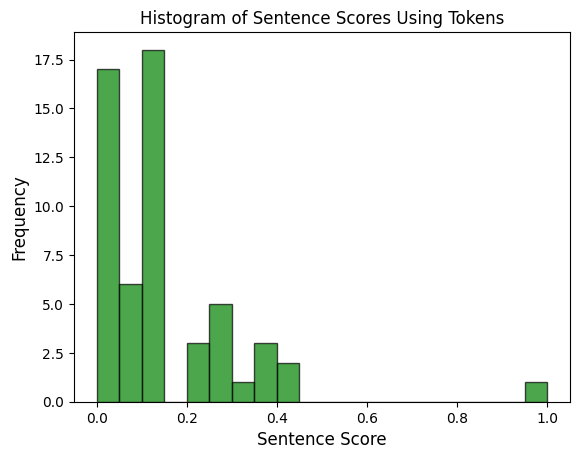

In [72]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)
sentences = [sent.text.strip() for sent in doc.sents]

sentence_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]

# Plot histogram
plt.hist(sentence_scores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores Using Tokens')
plt.xlabel('Sentence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# The most common range of scores based on the historgram below are between 0.0 and 0.2

### Question 7

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

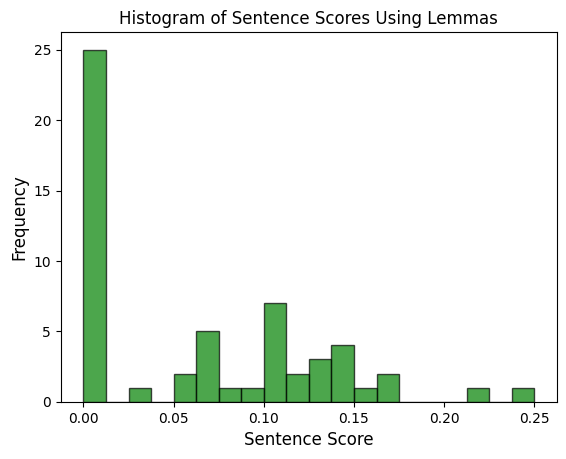

In [76]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)
sentences = [sent.text.strip() for sent in doc.sents]

sentence_scores = [score_sentence_by_lemma(sentence.text, interesting_lemmas) for sentence in doc.sents]

# Plot histogram
plt.hist(sentence_scores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores Using Lemmas')
plt.xlabel('Sentence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# The most common range of scores based on the historgram below are between 0.0 and 0.05

### Question 8

Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Tokens and Lemmas that are not nouns such as verbs and adjectives would be ommited from the lists generated in questions 3 and 4 if we only want to consider nouns as interesting words.

In order to only consider nouns as interesting words the code can be modified using spaCy to filter for nouns using POS tagging. I've modified the code below to filter for nouns only as interesting words using POS tagging.

In [79]:
# Filter out tokens that are not nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of nouns
noun_counts = Counter(nouns)

# Determine 5 most frequent noun tokens
most_frequent_nouns = noun_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Noun Tokens:")
for noun, freq in most_frequent_nouns:
    print(f"Noun: {noun}, Frequency: {freq}")

Top 5 Most Frequent Noun Tokens:
Noun: laser, Frequency: 29
Noun: headlights, Frequency: 17
Noun: technology, Frequency: 10
Noun: headlight, Frequency: 9
Noun: beam, Frequency: 7


In [81]:
# Filter out lemmas that are not nouns
lemmas = [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of nouns
lemma_counts = Counter(lemmas)

# Determine 5 most frequent noun lemmas
most_frequent_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Noun Lemmas:")
for lemma, freq in most_frequent_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Noun Lemmas:
Lemma: laser, Frequency: 34
Lemma: headlight, Frequency: 26
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 8
